In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.17.0


In [3]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
insurance.isnull().sum() , len(insurance)

(age         0
 sex         0
 bmi         0
 children    0
 smoker      0
 region      0
 charges     0
 dtype: int64,
 1338)

In [6]:
insurance.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [7]:
insurance_one_hot = pd.get_dummies(insurance, columns=['sex', 'smoker', 'region'], dtype=float)

In [8]:
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [9]:
from sklearn.model_selection import train_test_split

X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot.charges

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1070, 11), (1070,), (268, 11), (268,))

In [10]:
# def convert_to_tensor_type(data):
#     return tf.convert_to_tensor(data, dtype=tf.float32)
# X_train = convert_to_tensor_type(X_train)
# y_train = convert_to_tensor_type(y_train)
# X_test = convert_to_tensor_type(X_test) 
# y_test = convert_to_tensor_type(y_test)

In [11]:
X_train.shape

(1070, 11)

In [12]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(11,)), 
    tf.keras.layers.Dense(1)
], name='Model_1')

model_1.compile(loss=tf.keras.losses.mae, 
               optimizer=tf.keras.optimizers.SGD(), 
               metrics=[
                   tf.keras.metrics.MeanAbsoluteError(name='mae'),
                   tf.keras.metrics.MeanSquaredError(name='mse')
               ])

model_1.summary()

model_1.fit(X_train, y_train, epochs=100, verbose=0)

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1200      
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1301 (5.08 KB)
Trainable params: 1301 (5.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6431.5674 - mae: 6431.5674 - mse: 156198256.0000


[6431.5673828125, 6431.5673828125, 156198256.0]

In [14]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(11,)), 
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae, 
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
               metrics=[
                   'mae',
                   'mse'
               ])

# print(model_2.summary())

model_2.fit(X_train, y_train, epochs=100, verbose=0)
model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 1843.5020 - mae: 1843.5020 - mse: 21364898.0000


[1843.501953125, 1843.501953125, 21364898.0]

In [15]:
y_pred_1 = model_1.predict(X_test)

9/9 [==============================] - 0s 1ms/step


## Early Stopping Callback (Very important concept)

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

## Normalization and standardization 

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Normalization

In [16]:
# Preprocessing Data (Normalization and Standardization)

X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


<Axes: ylabel='Frequency'>

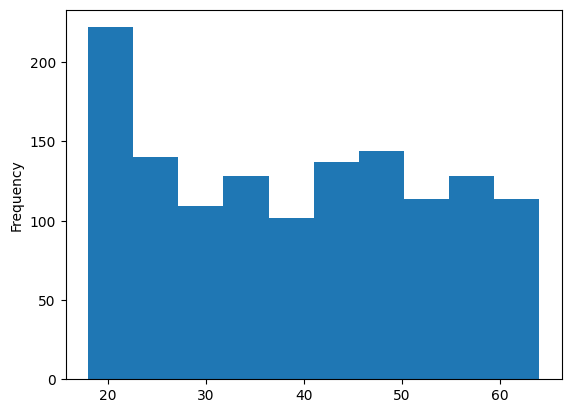

In [17]:
X['age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

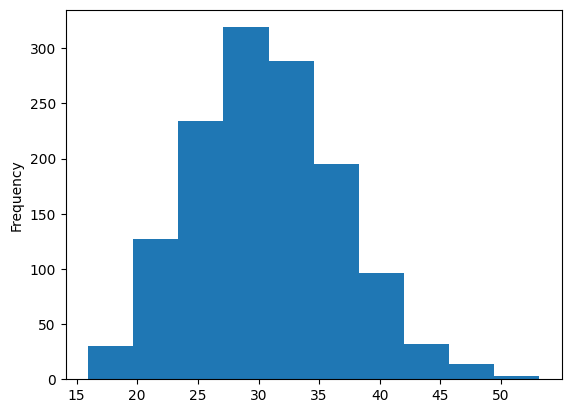

In [18]:
X['bmi'].plot(kind='hist')

## Featue scaling
1. Scale - Normalization  - MinMaxScaler - Converts all values between 0 and 1 - Neural Networks tend to prefer normalization
2. Standardization - Removes the mean and divides each value by the standard deviation - StandardScaler - 
Transform a feature to have a close to normal distribution (caution - this reduces the effect of outliers)

https://medium.com/data-science/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02


In [19]:
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf

In [20]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [21]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# create column tmake_column_transformer

column_transformer = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# Create X & y Values

X = insurance.drop('charges', axis=1)
y = insurance['charges']

# Create train & test splits

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit transformer only with train data - We should not show the model future data which is test data 
column_transformer.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder 
X_train_normal = column_transformer.transform(X_train)
X_test_normal = column_transformer.transform(X_test)

In [22]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [23]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [24]:
X_test_normal[0]

array([0.58695652, 0.24791499, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        ])

In [25]:
X_train.shape, X_test_normal.shape

((1070, 6), (268, 11))

In [26]:
# Create the model A
tf.random.set_seed(42)

model_A = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(11,)),
    tf.keras.layers.Dense(1)
])

model_A.compile(loss=tf.keras.losses.mae, 
               optimizer=tf.keras.optimizers.SGD(), 
               metrics=['mae', 'mse'])

model_A.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               1200      
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1301 (5.08 KB)
Trainable params: 1301 (5.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model_A.fit(X_train_normal, y_train, epochs=100, verbose=0)

In [28]:
model_A.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2906.5701 - mae: 2906.5701 - mse: 42075436.0000


[2906.570068359375, 2906.570068359375, 42075436.0]

In [29]:
# Model B
tf.random.set_seed

model_B = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(11,)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model_B.compile(loss=tf.keras.losses.mae, 
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=['mae', 'mse'])

model_B.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               1200      
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 11401 (44.54 KB)
Trainable params: 11401 (44.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model_B.fit(X_train_normal, y_train, epochs=100, verbose=0)

In [31]:
model_B.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 1722.5708 - mae: 1722.5708 - mse: 21052604.0000


[1722.57080078125, 1722.57080078125, 21052604.0]

In [32]:
X_train

,age,sex,bmi,children,smoker,region
560,46,female,19.950,2,no,northwest
1285,47,female,24.320,0,no,northeast
1142,52,female,24.860,0,no,southeast
969,39,female,34.320,5,no,southeast
486,54,female,21.470,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest
